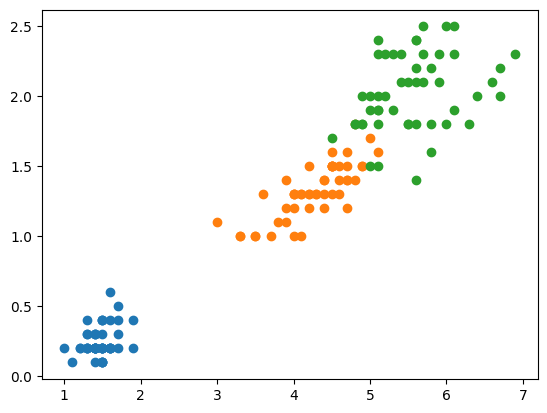

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from logistic_regression import LogisticRegressionModel

data = pd.read_csv('../data/iris.csv')
iris_types = ['SETOSA','VERSICOLOR','VIRGINICA']

x_axis = 'petal_length'
y_axis = 'petal_width'

for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],
                data[y_axis][data['class']==iris_type],
                label = iris_type
                )
plt.show()

In [2]:
num_examples = data.shape[0]
x_train = data[[x_axis,y_axis]].values.reshape((num_examples,2))
y_train = data['class'].values.reshape((num_examples,1))

max_iterations = 1000
polynomial_degree = 0
sinusoid_degree = 0

logistic_regression = LogisticRegressionModel(x_train,y_train,polynomial_degree,sinusoid_degree)
steps, hist = logistic_regression.train(max_iterations)

Cost at iteration 0: 1.0986
Cost at iteration 100: 0.6564
Cost at iteration 200: 0.5278
Cost at iteration 300: 0.4614
Cost at iteration 400: 0.4189
Cost at iteration 500: 0.3883
Cost at iteration 600: 0.3646
Cost at iteration 700: 0.3455
Cost at iteration 800: 0.3294
Cost at iteration 900: 0.3157


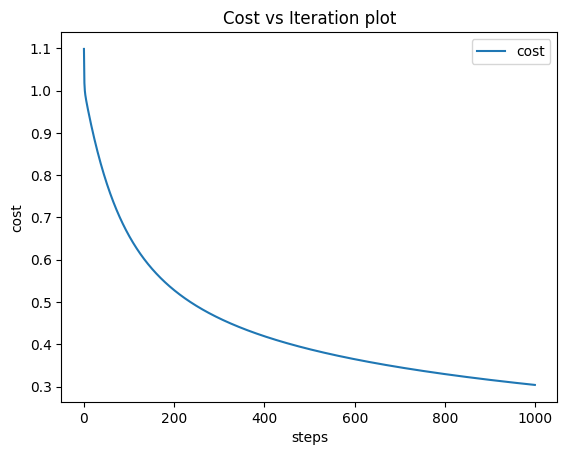

In [3]:
logistic_regression.plot_loss(steps, hist)

In [4]:
y_train_predictions = logistic_regression.predict(x_train)

In [7]:
x_min = np.min(x_train[:,0])
x_max = np.max(x_train[:,0])
y_min = np.min(x_train[:,1])
y_max = np.max(x_train[:,1])
samples= 150 
X = np.linspace(x_min,x_max,samples)
Y = np.linspace(y_min,y_max,samples)

Z_SETOSA = np.zeros((samples,samples))
Z_VERSICOLOR = np.zeros((samples,samples))
Z_VIRGINICA = np.zeros((samples,samples))

C:\Users\zheng\AppData\Local\Temp\ipykernel_28920\1160338044.py:19: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z_SETOSA)
C:\Users\zheng\AppData\Local\Temp\ipykernel_28920\1160338044.py:20: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z_VERSICOLOR)
C:\Users\zheng\AppData\Local\Temp\ipykernel_28920\1160338044.py:21: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z_VIRGINICA)


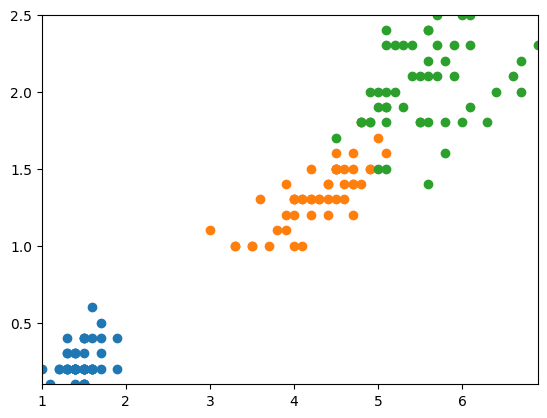

In [10]:
for x_index,x in enumerate(X):
    for y_index,y in enumerate(Y):
        data = np.array([[x,y]])
        prediction = logistic_regression.predict(data)[0][0]
        if prediction == 'SETOSA':
            Z_SETOSA[x_index][y_index] =1
        elif prediction == 'VERSICOLOR':
            Z_VERSICOLOR[x_index][y_index] =1
        elif prediction == 'VIRGINICA':
            Z_VIRGINICA[x_index][y_index] =1
            
for iris_type in iris_types:
    plt.scatter(
        x_train[(y_train == iris_type).flatten(),0],
        x_train[(y_train == iris_type).flatten(),1],
        label = iris_type
                )

plt.contour(X,Y,Z_SETOSA)
plt.contour(X,Y,Z_VERSICOLOR)
plt.contour(X,Y,Z_VIRGINICA)
plt.show()

C:\Users\zheng\AppData\Local\Temp\ipykernel_28920\1089841657.py:1: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z_SETOSA)
C:\Users\zheng\AppData\Local\Temp\ipykernel_28920\1089841657.py:2: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z_VERSICOLOR)
C:\Users\zheng\AppData\Local\Temp\ipykernel_28920\1089841657.py:3: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,Z_VIRGINICA)


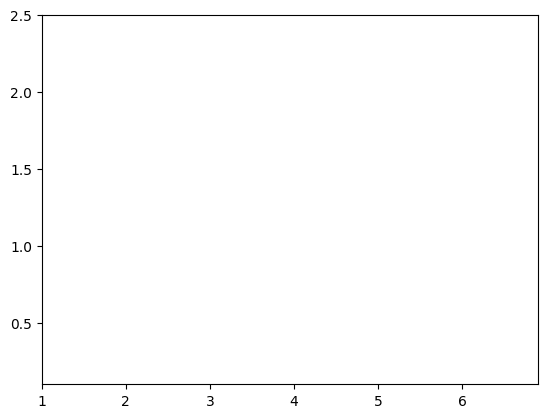